In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('../Ficheros/attack_limpieza2.csv', index_col=0)

In [2]:
df.head()

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
0,1800.00.00,1800,seychelles,a corsair's boat was overturned,NaN,NaN,1800,NaN,y,F,NaN
1,1797.05.28.R,1797,NaN,Dropped overboard,NaN,NaN,Reported May-28-1797,May,y,NaN,NaN
2,1792.09.12,1792,england,Fishing,NaN,NaN,12-Sep-1792,Sep,y,M,NaN
3,1791.00.00,1791,australia,NaN,NaN,NaN,1791,NaN,y,F,NaN
4,1788.05.10,1788,australia,Fishing,NaN,NaN,10-May-1788,May,n,NaN,NaN


1- Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [3]:
# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (15, 10)

2- Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [4]:
ataques_pais = pd.DataFrame(df.groupby("country").size().reset_index())

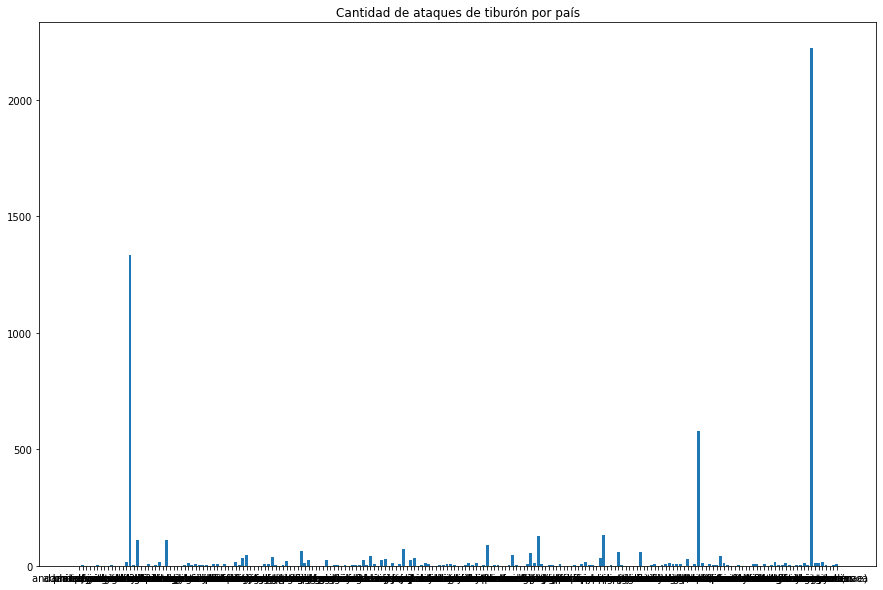

In [5]:
plt.figure()
x = ataques_pais["country"]
y = ataques_pais[0]
plt.bar(x, y)
plt.title('Cantidad de ataques de tiburón por país');

 * cómo podemos ver en esta gràfica es dificil ver cuántos ataques hay por país ya que al ser tantos no podemos leerla correctamente, así que vamos a reducir la cantidad de países a 10 en la siguiente gráfica para poder hacer un análisis mejor.

In [6]:
ataques_pais_ordenado = ataques_pais.sort_values(0, ascending = False)
ataques_diez = ataques_pais_ordenado.head(10)

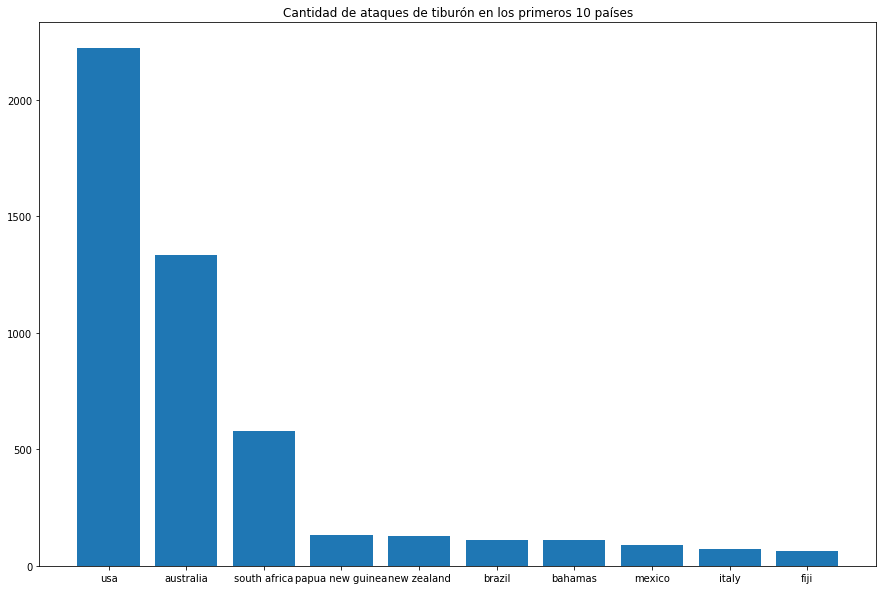

In [7]:
plt.figure()
x = ataques_diez["country"]
y = ataques_diez[0]
plt.bar(x, y)
plt.title('Cantidad de ataques de tiburón en los primeros 10 países');

* Al reducir la cantidad de países a 10 popdemos ver que hay 3 países cque destacan en ataques, sobretedo USA con el nível más alto seguido de Australia y sud Africa. El resto de países mantienen un nivel muy similar

In [8]:
ataques_diez["country"].unique()

array(['usa', 'australia', 'south africa', 'papua new guinea',
       'new zealand', 'brazil', 'bahamas', 'mexico', 'italy', 'fiji'],
      dtype=object)

Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [9]:
pais_sexo = df[["country", "sex2"]]
x = pais_sexo.groupby(["country", "sex2"]).size()

In [10]:
pd.DataFrame(x)


,,0
country,sex2,
philippines,M,1
tonga,M,3
admiralty islands,M,1
africa,M,1
algeria,M,1
...,...,...
vietnam,M,11
west indies,M,2
western samoa,M,1


In [11]:
pais_sexo = df[(df["country"] == 'usa') | (df["country"] == 'australia') | (df["country"] == 'south africa') | (df["country"] == 'papua new guinea') | (df["country"] == 'new zealand') | (df["country"] == 'brazil') | (df["country"] == 'bahamas') | (df["country"] == 'mexico') | (df["country"] == 'italy') | (df["country"] == 'fiji')]
pais_sexo_10 = pd.DataFrame(pais_sexo.groupby(["country", "sex2"]).size().reset_index())

In [12]:
pais_sexo_10

,country,sex2,0
0,australia,F,89
1,australia,M,1105
2,bahamas,F,15
3,bahamas,M,92
4,brazil,F,5
5,brazil,M,93
6,fiji,F,8
7,fiji,M,50
8,italy,F,2
9,italy,M,56


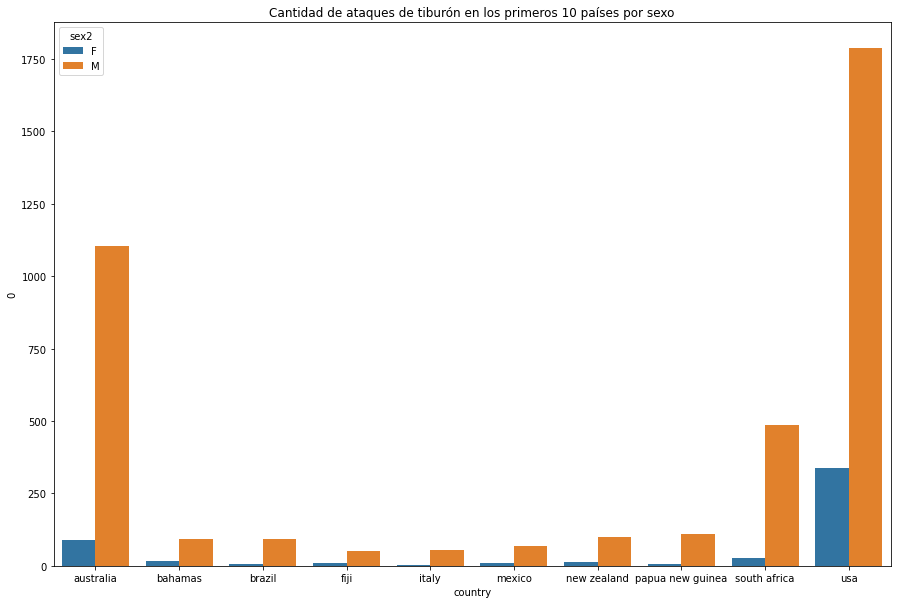

In [13]:
plt.figure()
fig = sns.barplot(x='country',y = 0, data = pais_sexo_10, hue = "sex2")
plt.title('Cantidad de ataques de tiburón en los primeros 10 países por sexo');


* Cómo se puede ver, en todos los países hay un mayor ataques en Hombres que en mujeres y de hecho esta diferencia es bastante significativa.

¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [14]:
lista_bins = [0,10,20,30,40,50,60,70,80,90]


In [15]:
df["edad_bins"] = pd.cut(df["nuevas_edades"],bins=lista_bins )

In [16]:
df["edad_bins"].unique()

[NaN, (10.0, 20.0], (20.0, 30.0], (30.0, 40.0], (0.0, 10.0], (40.0, 50.0], (50.0, 60.0], (60.0, 70.0], (80.0, 90.0], (70.0, 80.0]]
Categories (9, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]

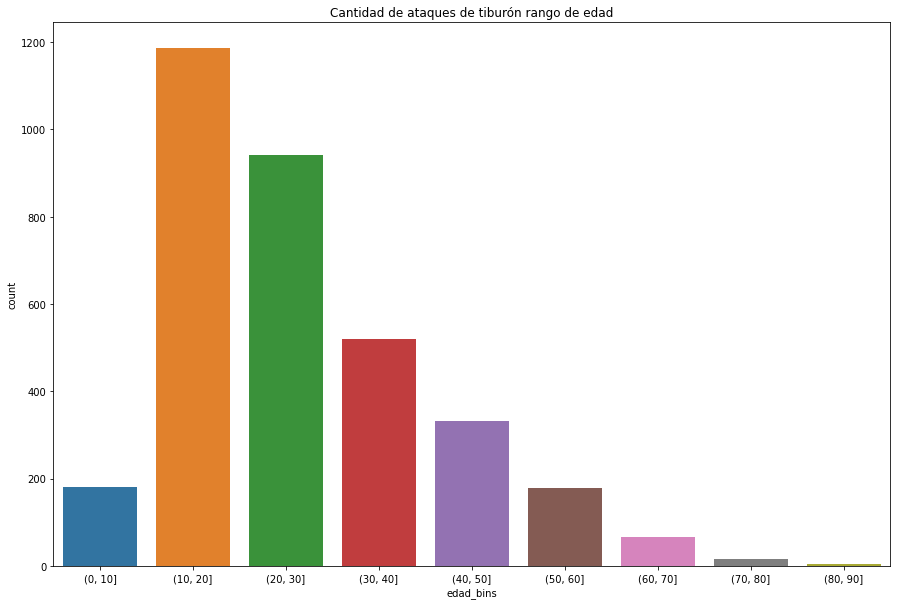

In [17]:
sns.countplot(x=df['edad_bins'])
plt.title('Cantidad de ataques de tiburón rango de edad');

* El rango de edad con mayor número de ataques podríamos decir que es entre los más jovenes de 10 a 30 años. también podemos apreciar que se disminuyen los ataques cuanto más edad y esta disminución es lineal. 

Ataques entre sexos, ¿hay diferencia?

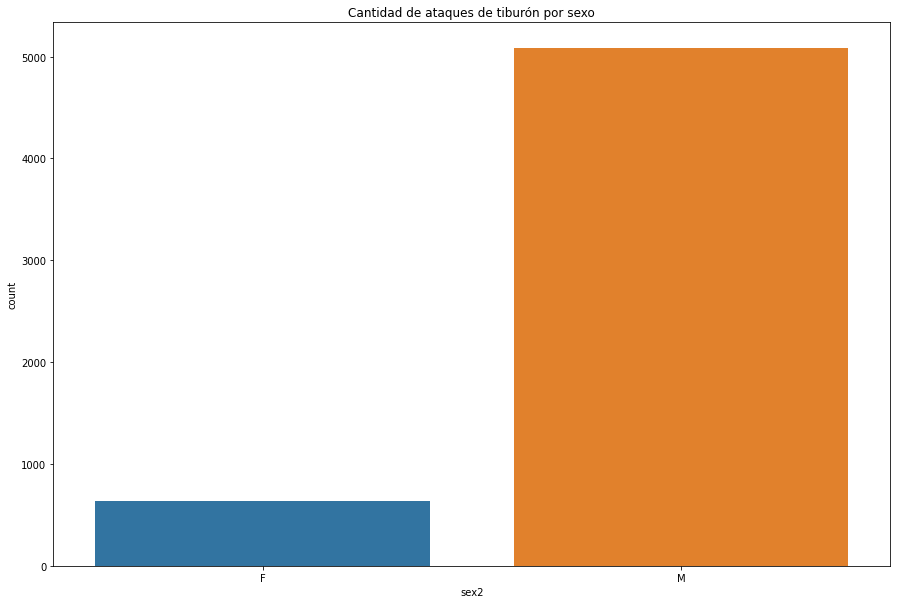

In [18]:
sns.countplot(x=df['sex2'])
plt.title('Cantidad de ataques de tiburón por sexo');

* Cómo ya habíamos visto en los ataques por país y sexo los hombres reciben más ataques que las mujeres, en esa gráfica sólo estabamos filtrando por los 10 primeros países, ahora que vemos los ataques de todos los países podemos confirmar que realmente si hay muchos más ataques en hombres que en mujeres

¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

<AxesSubplot:xlabel='mes', ylabel='count'>

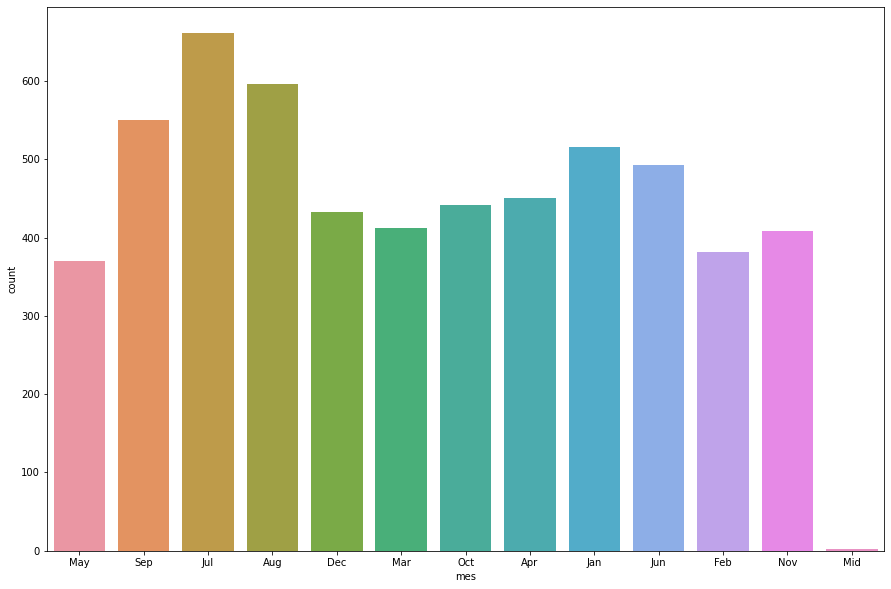

In [19]:
sns.countplot(x=df["mes"])

* No hay una diferencia elevada de ataques por més, podemos destacar más ataques en el mes de julio pero no es una diferència elevada. Tenemos un columna sin identificar llamada "Mid" es por ello que vamos a cambiar por "Unknown" en la siguiente gráfica.

In [24]:
df["mes"] = df["mes"].replace("Mid", "Unknown")

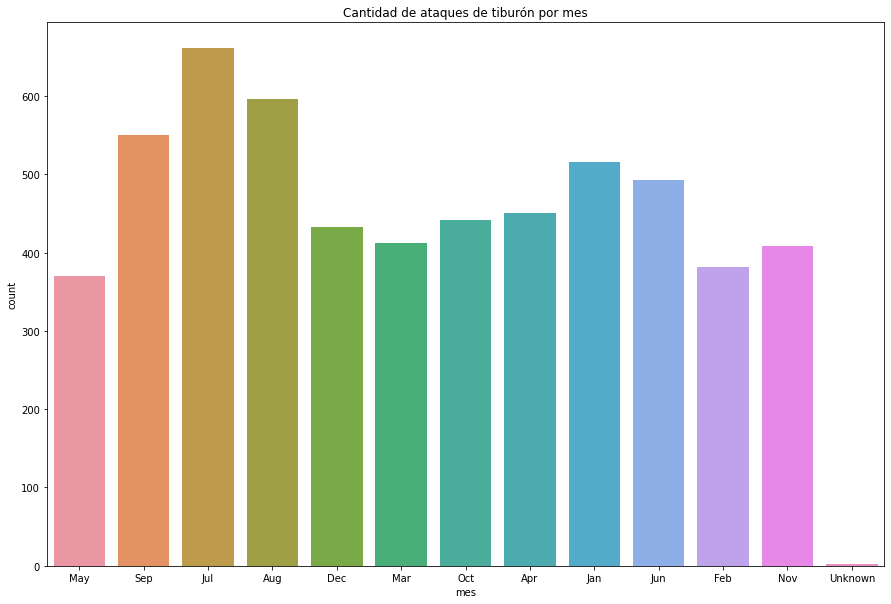

In [25]:
sns.countplot(x=df["mes"])
plt.title('Cantidad de ataques de tiburón por mes');

* Gráfica de ataques por mes modificando la columna "mid" por "unknown"